# Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from pandas.io.json import json_normalize
import datetime
import calendar

In [2]:
posts = pkl.load(open("../data/posts_since_2018.pkl", "rb"))


In [3]:
posts

[{'all_awardings': [],
  'allow_live_comments': False,
  'author': 'Thisiskindacoolig',
  'author_flair_css_class': None,
  'author_flair_richtext': [],
  'author_flair_text': None,
  'author_flair_type': 'text',
  'author_fullname': 't2_4safutxz',
  'author_patreon_flair': False,
  'awarders': [],
  'can_mod_post': False,
  'contest_mode': False,
  'created_utc': 1570927018,
  'domain': 'i.redd.it',
  'full_link': 'https://www.reddit.com/r/Rateme/comments/dh3ha2/hows_my_smile/',
  'gildings': {},
  'id': 'dh3ha2',
  'is_crosspostable': False,
  'is_meta': False,
  'is_original_content': False,
  'is_reddit_media_domain': True,
  'is_robot_indexable': False,
  'is_self': False,
  'is_video': False,
  'link_flair_background_color': '',
  'link_flair_richtext': [],
  'link_flair_text_color': 'dark',
  'link_flair_type': 'text',
  'locked': False,
  'media_only': False,
  'no_follow': True,
  'num_comments': 2,
  'num_crossposts': 0,
  'over_18': False,
  'parent_whitelist_status': 'house

In [4]:
posts_df = json_normalize(posts)

In [22]:
posts_df.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,awarders,...,author_id,archived,can_gild,hidden,link_flair_css_class,quarantine,subreddit_name_prefixed,media_embed.media_domain_url,brand_safe,previous_visits
0,[],False,Thisiskindacoolig,None,[],None,text,t2_4safutxz,False,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Hamzokxx,None,[],None,text,t2_3shmsxxb,False,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,Hanerbernerner,None,[],None,text,t2_2og09p7g,False,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,ratemethrowaway567,None,[],None,text,t2_4rj75t0q,False,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,kcalderero,None,[],None,text,t2_qsnq0,False,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
posts_df_cleaned = posts_df[['author', 'full_link','id','num_comments','title','created_utc']].copy()

In [24]:
posts_df_cleaned.head()

,author,full_link,id,num_comments,title,created_utc
0,Thisiskindacoolig,https://www.reddit.com/r/Rateme/comments/dh3ha...,dh3ha2,2,Hows my smile?,1570927018
1,Hamzokxx,https://www.reddit.com/r/Rateme/comments/dh3b6...,dh3b61,1,[20M] What do you think of the Arabic /Russian...,1570926123
2,Hanerbernerner,https://www.reddit.com/r/Rateme/comments/dh37s...,dh37sw,2,Kinda low self esteem. Honest feedback please....,1570925643
3,ratemethrowaway567,https://www.reddit.com/r/Rateme/comments/dh368...,dh368y,18,[25 F] Got a haircut today. Some are with make...,1570925434
4,kcalderero,https://www.reddit.com/r/Rateme/comments/dh32c...,dh32ch,1,#RateMe,1570924840


In [26]:
posts_df_cleaned['date'] = pd.to_datetime(posts_df_cleaned['created_utc'],unit = 's')

In [27]:
posts_df_cleaned.head()

,author,full_link,id,num_comments,title,created_utc,date
0,Thisiskindacoolig,https://www.reddit.com/r/Rateme/comments/dh3ha...,dh3ha2,2,Hows my smile?,1570927018,2019-10-13 00:36:58
1,Hamzokxx,https://www.reddit.com/r/Rateme/comments/dh3b6...,dh3b61,1,[20M] What do you think of the Arabic /Russian...,1570926123,2019-10-13 00:22:03
2,Hanerbernerner,https://www.reddit.com/r/Rateme/comments/dh37s...,dh37sw,2,Kinda low self esteem. Honest feedback please....,1570925643,2019-10-13 00:14:03
3,ratemethrowaway567,https://www.reddit.com/r/Rateme/comments/dh368...,dh368y,18,[25 F] Got a haircut today. Some are with make...,1570925434,2019-10-13 00:10:34
4,kcalderero,https://www.reddit.com/r/Rateme/comments/dh32c...,dh32ch,1,#RateMe,1570924840,2019-10-13 00:00:40


In [21]:
posts_df_cleaned = posts_df_cleaned.set_index('date')

In [16]:
posts_df_cleaned.head()

,author,full_link,id,num_comments,title,created_utc
date,,,,,,
2019-10-13 00:36:58,Thisiskindacoolig,https://www.reddit.com/r/Rateme/comments/dh3ha...,dh3ha2,2,Hows my smile?,1570927018
2019-10-13 00:22:03,Hamzokxx,https://www.reddit.com/r/Rateme/comments/dh3b6...,dh3b61,1,[20M] What do you think of the Arabic /Russian...,1570926123
2019-10-13 00:14:03,Hanerbernerner,https://www.reddit.com/r/Rateme/comments/dh37s...,dh37sw,2,Kinda low self esteem. Honest feedback please....,1570925643
2019-10-13 00:10:34,ratemethrowaway567,https://www.reddit.com/r/Rateme/comments/dh368...,dh368y,18,[25 F] Got a haircut today. Some are with make...,1570925434
2019-10-13 00:00:40,kcalderero,https://www.reddit.com/r/Rateme/comments/dh32c...,dh32ch,1,#RateMe,1570924840


In [38]:
df = posts_df_cleaned['date'].groupby(by = posts_df_cleaned['date'].dt.date).count().reset_index(name = 'count')

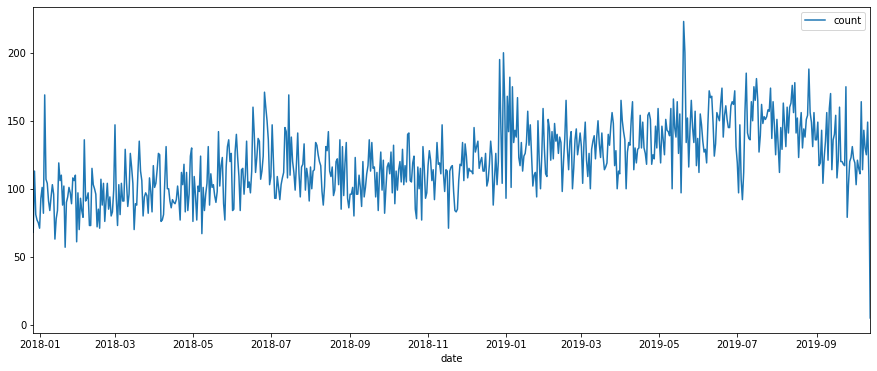

In [43]:
df.plot(x='date',y='count',figsize = (15,6))
plt.ylabel = 'count'